# Goal

The goal of this project is to use a Convolution Neural Network to classify handwritten numbers from the MNIST dataset.

In [1]:
import numpy as np
import pandas as pd

## Data 

First, import the data. This is a standard dataset so you can import the data with the keras package. Within the dataset, there is both training and testing data. 

In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

We may want to look at the shape of the data to learn more about it. We see that there is 60,000 images in the training set and 10,000 in the testing set. The (28,28) means the images are 28X28. The X datasets include the images while the Y datasets include the labels. 

In [3]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


Now that I know more info about the data, I need to plot it to see what we are looking at. I first take a look at only the first image, then I write a function to look at the first 9 images. 

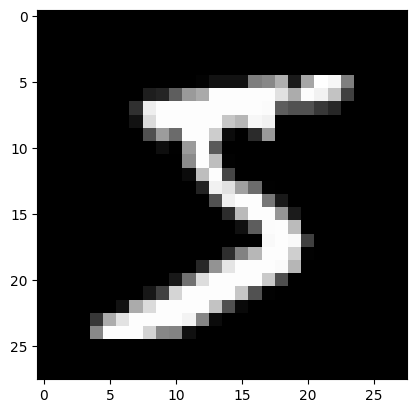

In [4]:
from matplotlib import pyplot
first_image = X_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
pyplot.imshow(pixels, cmap='gray')
pyplot.show()

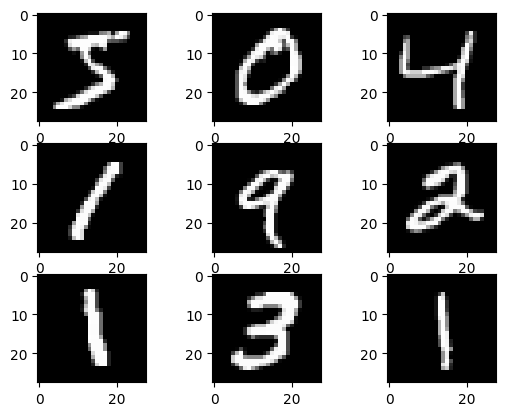

In [5]:
for i in range(9):  
    # defines subplot
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Build a CNN Model 

With the data preprocessing complete, I am now ready to develop a model. I will use the following libraries from tensorflow in the analysis.  

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

I normalize the data by diving the values by 255. This is because the pixel range is from 0 to 256 so this will convert the range of values from 0 to 1. 

In [7]:
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32')
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

Next I categorize the resulting vectors (ie the labels). Because the digits are between 0 and 9, we have 10 categories. If the number fits in in the current category, then it is a 1, otherwise it is a 0.  

In [8]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Now I can actually build the CNN model. I started with a sequential model. This lets me build the model layer by layer. 

A little bit about CNNs. A CNN is essentially 4 important layers: convolution layer, ReLU layer, pooling layer, and fully connected layer. 
- The convolution layer extracts the important features from the data. This helps the network learn patterns.
- The ReLU (non linearity) layer basically sets all negative pixels to 0. This helps better locate features. 
- Pooling layer reduces the dimensionality of the image. This helps to prevent overfitting.
- classification layer (fully connected layer) connects all neurons from previous layer to current layer. You can use a softmax activation function.

I started with the following layers in the model: 
1. convolution layer (32 3x3 filters)
2. pooling layer
3. flatten data
4. dense layer 

Once I built the model, I compiled it with the adam optimizer as this is typically a good fit for general use cases. 

I fit the model and checked the accuracy then tested it on a random sample from the testing dataset. 


In [9]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(10, activation='softmax'))

In [10]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model1.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2090 - accuracy: 0.9403 - val_loss: 0.0853 - val_accuracy: 0.9734
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9775 - val_loss: 0.0663 - val_accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0582 - accuracy: 0.9825 - val_loss: 0.0673 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0591 - val_accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0539 - val_accuracy: 0.9818


In [12]:
test_loss, test_acc = model1.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 958us/step - loss: 0.0539 - accuracy: 0.9818
Test accuracy: 0.9818000197410583


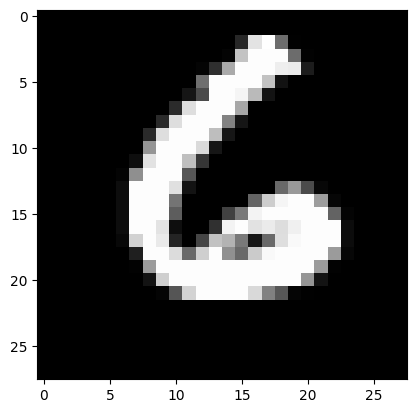

313/313 [==============================] - 0s 1ms/step
The actual label is: 6
The predicted label is:  6


In [13]:
random_index = np.random.randint(0, 10000)

image = X_test[random_index]

# this is an image of the current value
pyplot.imshow(image, cmap='gray')
pyplot.show()

# this is the models prediction

prediction = model1.predict(X_test)
print("The actual label is:", np.argmax(Y_test[random_index]))
print("The predicted label is: ", np.argmax(prediction[random_index]))

### Model, again

I tested my skills and added a couple more layers to the neural network to see if it would perform better. 

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

An epoch is a pass through the training set. When fitting the data, 5 epochs keeps the training time short but also gives a higher accuracy. I could play around with this but since this is just practice, there is no need. 

In [16]:
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 9s 10ms/step - loss: 0.1764 - accuracy: 0.9457 - val_loss: 0.0606 - val_accuracy: 0.9814
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0343 - val_accuracy: 0.9878
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 5/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0367 - val_accuracy: 0.9884


In [17]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9884
Test accuracy: 0.9883999824523926


I want to minimize loss and maximize accuracy. By evaluating the model, I see that I have done just that. Adding more layers did improve the accuracy but it was already good before so there is a tradeoff. 

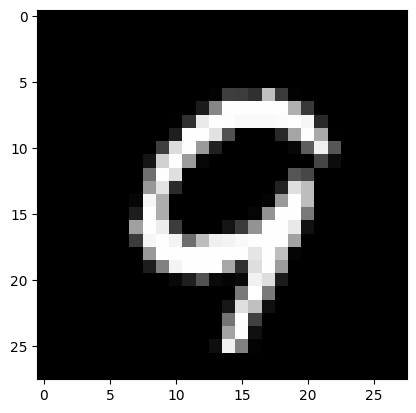

313/313 [==============================] - 0s 1ms/step
The actual label is: 9
The predicted label is:  9


In [18]:
random_index = np.random.randint(0, 10000)

image = X_test[random_index]

# this is an image of the current value
pyplot.imshow(image, cmap='gray')
pyplot.show()

# this is the models prediction

prediction = model1.predict(X_test)
print("The actual label is:", np.argmax(Y_test[random_index]))
print("The predicted label is: ", np.argmax(prediction[random_index]))
